# Titanic Survival Prediction

## Introduction

On April 15, 1912, during her first voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. This project will consist of an analysis of the different circumstances and characteristics (referred to as _features_) of each passenger, and will try to predict the survival of passengers based on these features. 

This prediction model is created as part of a Kaggle challenge, which can be found [here](https://www.kaggle.com/c/titanic).


## Data

The raw data for this analysis consists of 3 csv files:
- train.csv 
- test.csv

The data in train.csv will be used to train the prediction model, and the test.csv will be used to test how well the model is able to predict the survival of passengers by submitting the results to Kaggle. The train.csv file contains the following columns:

| **Column** | **Description** | **Key** |
| ---| --- | --- |
| PassengerId | The unique identifier of each passenger | |
| Survived | Whether or not the passenger survived | 0 = not survived, 1 = survived|
| Pclass | The class in which the passenger was staying on the Titanic | 1 = 1st class, 2 = 2nd class, 3 = 3rd class|
| Name | Name and title of the passenger | |
| Sex | Gender of the passenger | male, female| 
| Age | Age in years | |
| SibSp | Number of siblings / spouses aboard the Titanic | | 
| Parch | Number of parents / children aboard the Titanic | |
| Ticket | Ticket number of the passenger | |
| Fare | Price of the passenger's ticket | |
| Cabin | Cabin number of the passenger | |
| Embarked | Port from which the passenger embarked the Titanic | C = Cherbourg, Q = Queenstown, S = Southampton|


The test.csv file contains all above mentioned columns, except for the column "Survived".

For the data exploration, data preparation and model creation, only the train.csv file will be used. 

## Package imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Initial Data Exploration

In [2]:
titanic_df = pd.read_csv("../raw_data/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape
print(f'There are {titanic_df.shape[0]} rows/passengers and {titanic_df.shape[1]} columns in the dataframe')

There are 891 rows/passengers and 12 columns in the dataframe


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
titanic_df.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report shows that there are some missing values in the dataset, and high correlation between some of the columns. In addition, there are some columns that don't provide additional information to predict the survival of the passengers. Before looking deeper into the relationship between the features, we will first prepare the data for analysis. 

## Data Preparation

### Duplicate values

In [35]:
titanic_df.duplicated().sum()

0

There are no duplicate values in the training dataset.

### Columns to drop

#### PassengerId

The column PassengerId is a unique identifier of the passenger in our dataframe. This is however not a meaningful column for our survival prediction, which it doesn't tell us anything significant about the passenger. We will therefore drop the columb from our data 

In [5]:
titanic_df.drop("PassengerId", axis="columns", inplace=True)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### Ticket

In [25]:
titanic_df["Ticket"].value_counts().count()

681

There are 681 different values for the Ticket column

In [26]:
titanic_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Since there are 681 different values for Ticket, and the ticket number doens't give us any more information, we will drop the column from the analysis.

In [27]:
titanic_df.drop("Ticket", axis="columns", inplace=True)

In [30]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Missing values

In [7]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Not all columns are filled with values. The following columns have missing values:
- Age: 177 missing values
- Cabin: 687 missing values
- Embarked: 2 missing values

Let's see for each of the columns why the values could be missing

#### Age

In [262]:
titanic_df[titanic_df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr,0
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S,Mr,0
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C,Mrs,0
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C,Mr,0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q,Miss,0
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C,Mr,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S,Miss,10
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S,Mr,0
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S,Mr,0


There is no clear reason why the ages are missing for these passengers. To fill the missing data, we will use a Simple Imputer to fill these missing fields with the mean of the entire Age column. 

In [265]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic_df["Age"] = imp_mean.fit_transform(titanic_df[["Age"]])
titanic_df[titanic_df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family


#### Cabin

In [9]:
titanic_df[titanic_df["Cabin"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
titanic_df["Cabin"].value_counts().count()

147

There are 147 different values in the Cabin column

In [11]:
titanic_df[titanic_df["Cabin"].isnull()]["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [12]:
titanic_df[titanic_df["Cabin"].notnull()]["Pclass"].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

It is also very difficult to see why some passengers have a registration of the cabin, and why some have not. As [this article from BBC](https://www.bbc.co.uk/bitesize/topics/z8mpfg8/articles/zkg9dxs) states, there were cabins for all 3 classes on the Titanic. Since there are 687 missing values, and 147 different cabin numbers, the Cabin column doesn't give us much information on the passengers. Therefoee, we drop the whole column from the dataset

In [38]:
titanic_df.drop(columns=["Cabin"], inplace=True)

In [39]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### Embarked

In [14]:
titanic_df[titanic_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are only 2 passengers of which the Embarked column fields are missing. A quick google search shows that:
- [Miss. Amelie Icard embarked on Southampton](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
- [Mrs. George Nelson (Martha Evelyn) Stone also embarked on Southamption](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

Therefore, these missing values will be filled with "S". 

In [40]:
titanic_df[titanic_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [41]:
titanic_df["Embarked"].fillna("S", inplace=True)

In [42]:
titanic_df.loc[[61,829]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,S


In [43]:
titanic_df["Embarked"].isnull().sum()

0

### Other columns

#### Sex

In [47]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are only 2 values in this column, male and female, and there are no missing values. 

#### Name

In [33]:
titanic_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

It is difficult to see whether there are any missing values in the Name column. I do see that there is some information on the Title of the passenger in the name column. I will create a new Title column in Feature Engineering to use this information. 

#### ** Feature engineering - Title column

In [49]:
titanic_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The Name column contains the title of the passenger, which will be added to a new column called Title. 

In [50]:
titanic_df["Title"] = titanic_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0])

In [51]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [53]:
titanic_df["Title"].value_counts().sum()

891

In [54]:
titanic_df.shape[0]

891

There are no missing values in the Title column, which means that we can now use the Title column for our analysis. 

### Distibution of numerical data

In [15]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 6 numerical columns in the data to be explored for the prediction model:
- Pclass
- Age
- SibSp
- Parch
- Fare

Let's first look at the individual distribution of these features, and then see if there is a correlation between each of these features. 

#### Individual distribution plots

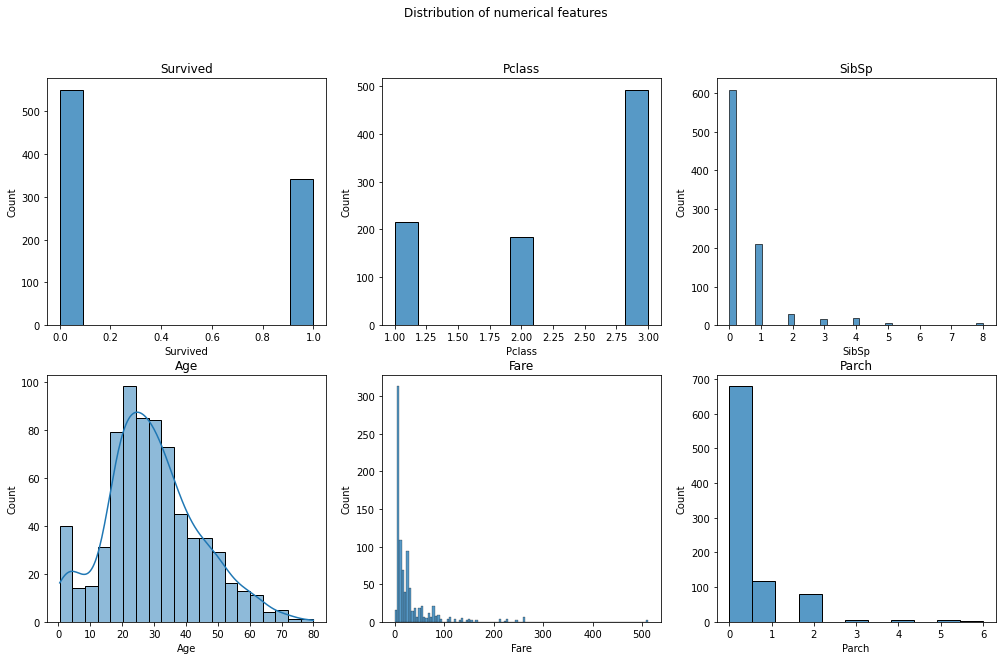

In [106]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(17,10))
sns.histplot(titanic_df['Survived'], ax=axs[0,0])
sns.histplot(titanic_df['Pclass'], ax=axs[0,1])
sns.histplot(titanic_df['SibSp'], ax=axs[0,2])
sns.histplot(titanic_df['Age'], ax=axs[1,0], kde=True)
sns.histplot(titanic_df['Fare'], ax=axs[1,1])
sns.histplot(titanic_df['Parch'], ax=axs[1,2])

axs[0,0].set_title("Survived")
axs[0,1].set_title("Pclass")
axs[0,2].set_title("SibSp")
axs[1,0].set_title("Age")
axs[1,1].set_title("Fare")
axs[1,2].set_title("Parch")

fig.suptitle("Distribution of numerical features")
plt.show()

### Distibution of categorical data

In [37]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


The categorical columns in this dataset are:
- Name
- Sex
- Embarked
- Title (newly created column)

Since Name is a unique value for each of the passengers, it doesn't make sense to look at the distribution of this column's values.

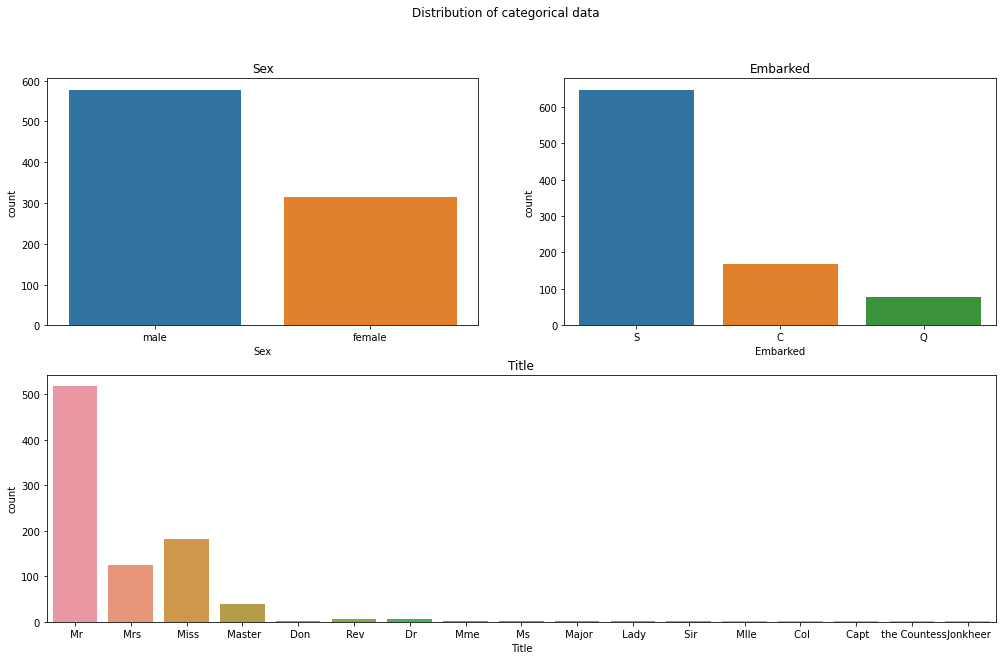

In [70]:
fig = plt.figure(figsize=(17, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]
sns.countplot(x='Sex', data=titanic_df, ax=ax1)
sns.countplot(x='Embarked', data=titanic_df, ax=ax2)
sns.countplot(x='Title', data=titanic_df, ax=ax3);
ax1.set_title("Sex")
ax2.set_title("Embarked")
ax3.set_title("Title")
fig.suptitle("Distribution of categorical data");

### Correlation between features

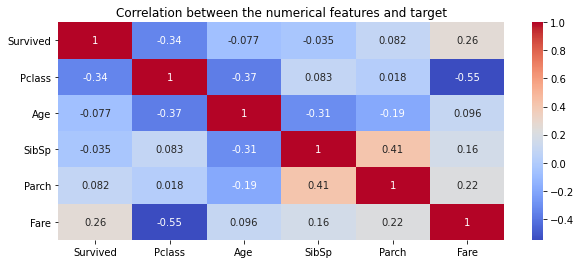

In [17]:
fig = plt.figure(figsize=(10,4))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm').set_title("Correlation between the numerical features and target");

There seems to be some correlation between:
- Pclass and Fare (-0.55)
- SibSp and Parch (0.41)
- Pclass and Age (-0.37)
- Survived and Plcass (-0.34)
- SibSp and Age (-0.31)

Let's visualize the relationship between these features better.

#### Pclass and Fare

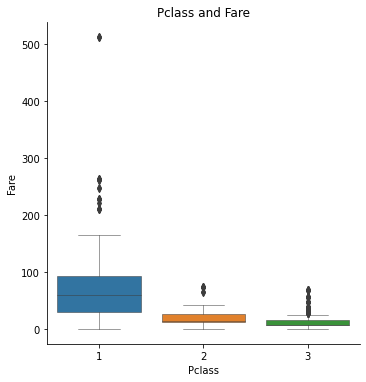

In [118]:
sns.catplot(x="Pclass", y="Fare", data=titanic_df, kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Fare");

The relationship shows that the lower fare prices were mostly for Pclass 3, and the highest fare prices for Pclass 1. There is however some overplat, and it seems that there were tickets at 0 for each of the Pclasses, and some tickets for Plcass 1 and Pclass 2 that were the same price as Plcass 1. The interquartile range of the Pclasses hardly overlap though. 

#### SibSp and Parch

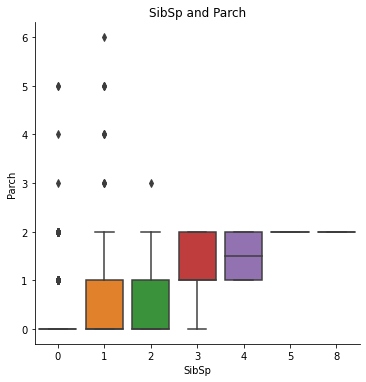

In [126]:
sns.catplot(x="SibSp", y="Parch", data=titanic_df, kind="box")
plt.title("SibSp and Parch");

Most passengers that travel with siblings or spouses also travel with 1 or 2 parents or children. Therefore, it might be interesting to take these two features together and create a new Family column that takes the sum of both columns for each passenger.

#### ** Feature engineering - Family column

In [134]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

The new Family column will add the values of SipSp and Parch for each passenger.

In [135]:
titanic_df["Family"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [136]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0


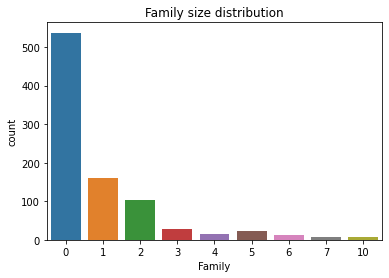

In [140]:
sns.countplot(x="Family", data=titanic_df)
plt.title("Family size distribution");

#### Pclass and Age

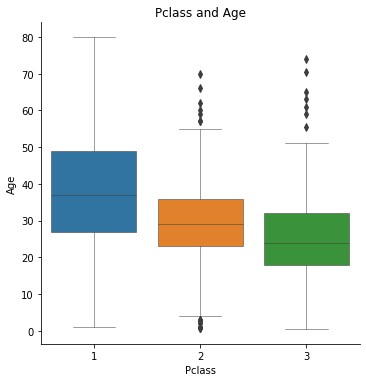

In [145]:
sns.catplot(x="Pclass", y="Age", data=titanic_df, kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Age");

We see that younger passengers are mostly in the Pclasses 3 and 2. 

#### SibSp/Family and Age 

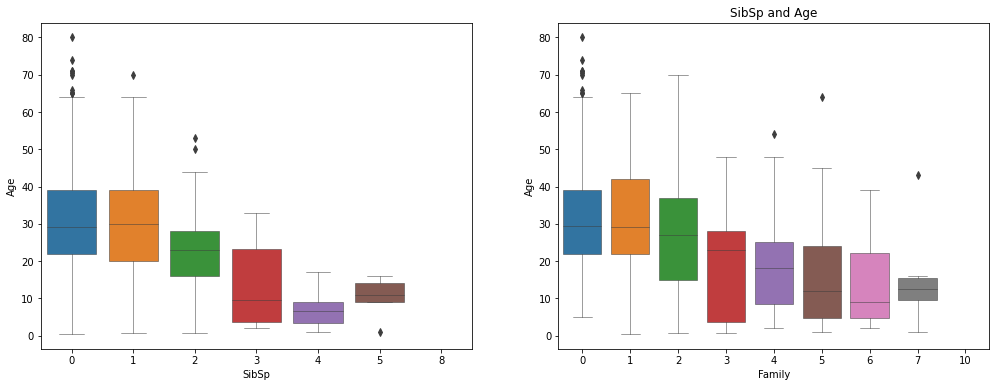

In [182]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sns.boxplot(x="SibSp", y="Age", data=titanic_df, linewidth=0.5, ax=ax[0])
sns.boxplot(x="Family", y="Age", data=titanic_df,linewidth=0.5, ax=ax[1])
plt.title("SibSp and Age");

Passengers with more siblings or spouces are usually younger, which would suggest that they are part of larger families with multiple children. Older passengers (55+ in age) mostly traveled alone or with 1 spouce or sibling.

### Correlation with target

We have seen that Pclass, Age and Family are correlated with each other in some way. Let's see if there is a correlation between the features and the target Survived as well. 

#### Survived and Plcass

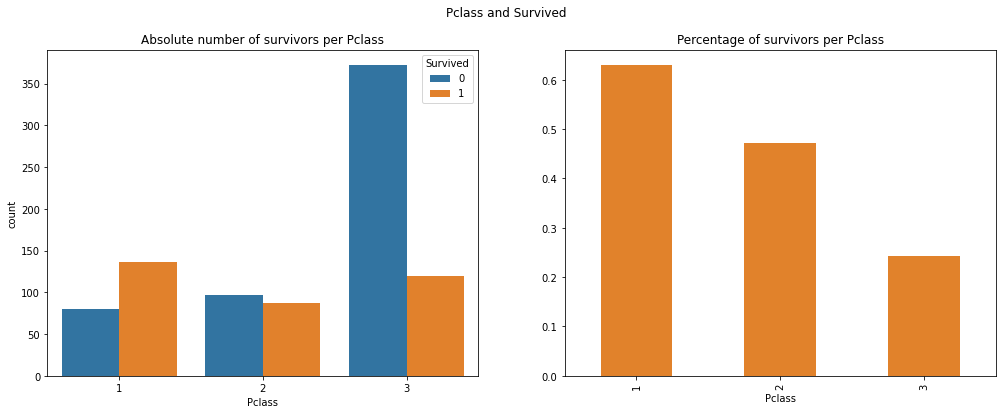

In [183]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sns.countplot(x="Pclass", data=titanic_df, hue="Survived", ax=ax[0])
ax[0].set_title("Absolute number of survivors per Pclass")

perc_survivors_df = titanic_df.groupby("Pclass")["Survived"].mean()
perc_survivors_df.plot(kind="bar", ax=ax[1], color="#E1822B")
ax[1].set_title("Percentage of survivors per Pclass")

fig.suptitle("Pclass and Survived");

The absolute number of survivors in each class for all 3 classes is somewhere between 80 and 140 for each class. However, since there were a lot more passengers in Pclass 3, the percentage of survivors in Plcass 3 is a lot lower than in Pclass 2, and even lower than in Pclass 1. 

#### Survived, Pclass and Age

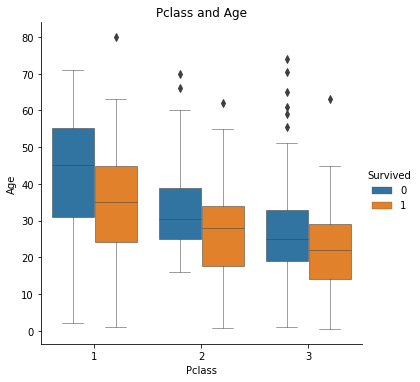

In [185]:
sns.catplot(x="Pclass", y="Age", data=titanic_df, hue="Survived", kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Age");

When adding the Age column to the visualization, we can see that on average more younger people than older people survived in each Pclass.

#### Survived and Age

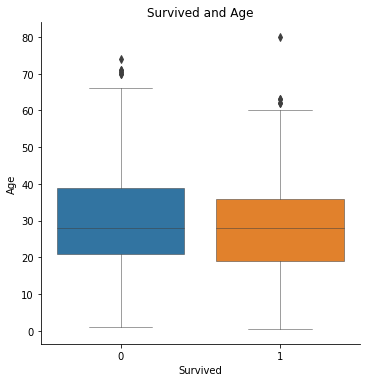

In [195]:
sns.catplot(x="Survived", y="Age", data=titanic_df, linewidth=0.5, kind="box")
plt.title("Survived and Age");

There doesn't seem to be a lot of difference in overall age for the group of survivors compared to the non-survivors.

#### Survived and Embarked

In [213]:
embarked_survivors_df = titanic_df.groupby("Embarked")[["Survived"]].count()
embarked_survivors_df.columns=["Total"]
embarked_survivors_df["Survived"] = titanic_df.groupby("Embarked")[["Survived"]].sum()
embarked_survivors_df["Percentage"] = embarked_survivors_df["Survived"]/embarked_survivors_df["Total"]
embarked_survivors_df

,Total,Survived,Percentage
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,646,219,0.339009


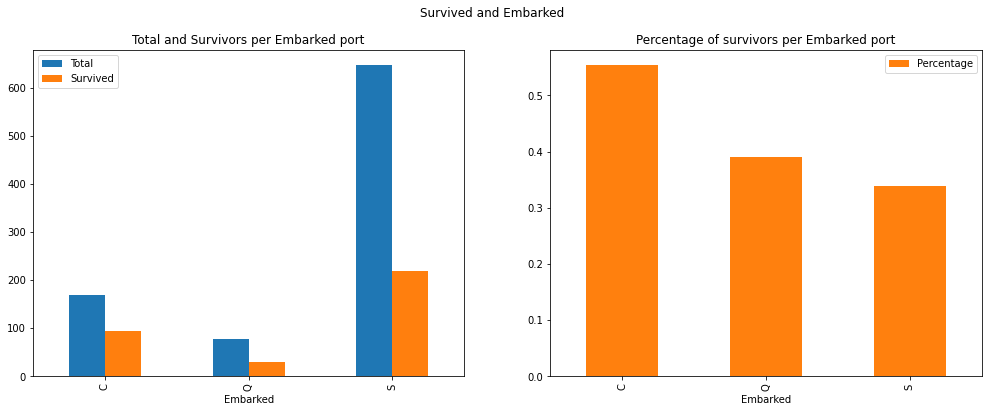

In [231]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
embarked_survivors_df.drop(columns=["Percentage"]).plot(kind="bar", ax=ax[0])
ax[0].set_title("Total and Survivors per Embarked port")
embarked_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Embarked port")
plt.suptitle("Survived and Embarked");

The percentage of survivors from the embarked port Cherbourg (France) is higher than from Queensland (Ireland) and Southampton (U.K). Perhaps this has to do with the Pclass of the Passengers.

#### Survived, Embarked and Pclass 

In [223]:
embarked_pclass_df = titanic_df.groupby(["Embarked", "Pclass"])[["Survived"]].count()
embarked_pclass_df.columns=["Total"]
embarked_pclass_df["Survived"] = titanic_df.groupby(["Embarked", "Pclass"])[["Survived"]].sum()
embarked_pclass_df["Percentage"] = embarked_pclass_df["Survived"]/embarked_pclass_df["Total"]
embarked_pclass_df

Total  Survived  Percentage
Embarked Pclass                             
C        1          85        59    0.694118
         2          17         9    0.529412
         3          66        25    0.378788
Q        1           2         1    0.500000
         2           3         2    0.666667
         3          72        27    0.375000
S        1         129        76    0.589147
         2         164        76    0.463415
         3         353        67    0.189802

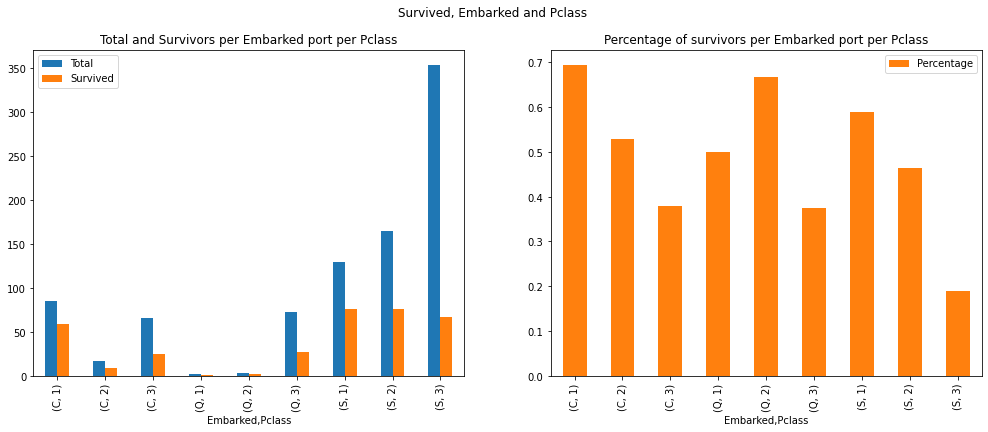

In [232]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
embarked_pclass_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Embarked port per Pclass")
embarked_pclass_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Embarked port per Pclass")
plt.suptitle("Survived, Embarked and Pclass");

Most of the passengers in Cherbourg were in the 1st class or 3rd class, however many more passengers in the 1st class embarked in Cherbourg survived. There is also a high survival rate for the 2nd class passengers that embarked in Queensland, however there were only a few passengers in this group. The 3rd class Southampton passengers is by far the largest group, and has the lowers survival rate. 

In [233]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')

#### Survived and Sex

In [236]:
sex_survivors_df = titanic_df.groupby("Sex")[["Survived"]].count()
sex_survivors_df.columns=["Total"]
sex_survivors_df["Survived"] = titanic_df.groupby("Sex")[["Survived"]].sum()
sex_survivors_df["Percentage"] = sex_survivors_df["Survived"]/sex_survivors_df["Total"]
sex_survivors_df

,Total,Survived,Percentage
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


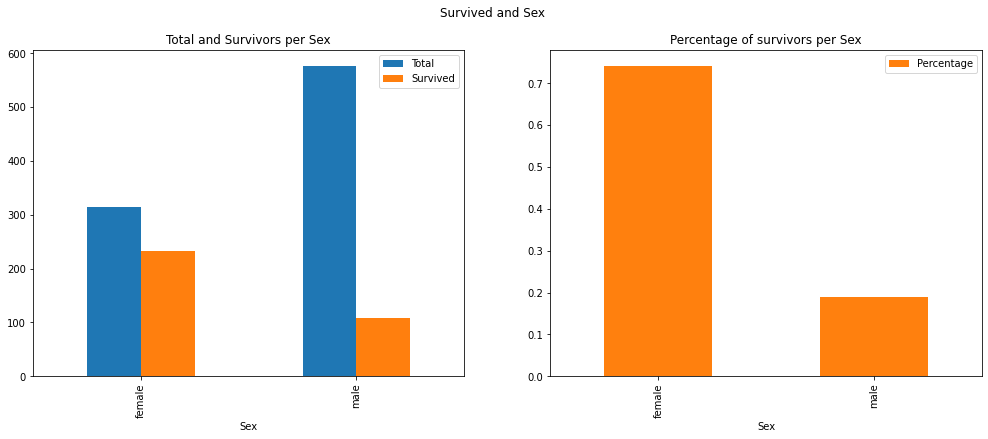

In [237]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sex_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Sex")
sex_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Sex")
plt.suptitle("Survived and Sex");

It is very clear to see that the survival rate for female passengers is a lot higher that the survival rate of male passengers.

#### Survived and Family

In [244]:
fam_survivors_df = titanic_df.groupby("Family")[["Survived"]].count()
fam_survivors_df.columns=["Total"]
fam_survivors_df["Survived"] = titanic_df.groupby("Family")[["Survived"]].sum()
fam_survivors_df["Percentage"] = fam_survivors_df["Survived"]/fam_survivors_df["Total"]
fam_survivors_df

,Total,Survived,Percentage
Family,,,
0,537,163,0.303538
1,161,89,0.552795
2,102,59,0.578431
3,29,21,0.724138
4,15,3,0.200000
5,22,3,0.136364
6,12,4,0.333333
7,6,0,0.000000
10,7,0,0.000000


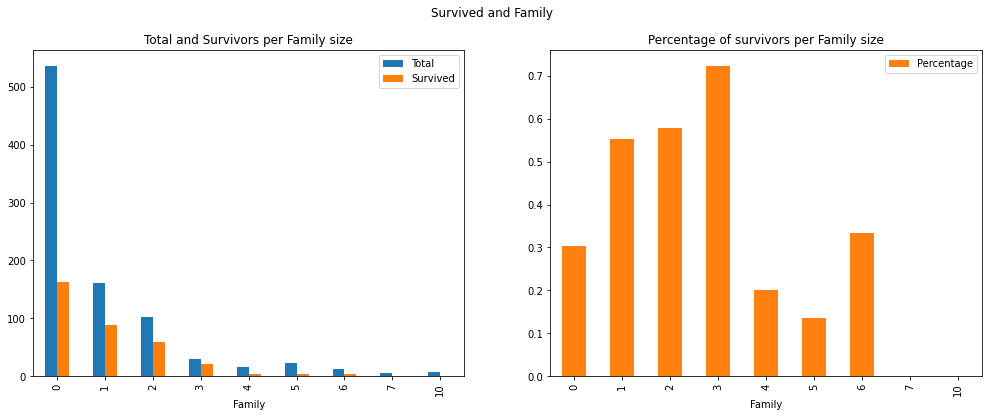

In [246]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
fam_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Family size")
fam_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Family size")
plt.suptitle("Survived and Family");

Even though there were much more passengers with no additional family on board, the higher survival rates are found for passengers with a Family size of 3, 2 or 1. 

#### Survived and Title

In [251]:
title_survivors_df = titanic_df.groupby("Title")[["Survived"]].count()
title_survivors_df.columns=["Total"]
title_survivors_df["Survived"] = titanic_df.groupby("Title")[["Survived"]].sum()
title_survivors_df["Percentage"] = title_survivors_df["Survived"]/title_survivors_df["Total"]
title_survivors_df.sort_values("Total", ascending=False, inplace=True)
title_survivors_df

,Total,Survived,Percentage
Title,,,
Mr,517,81,0.156673
Miss,182,127,0.697802
Mrs,125,99,0.792000
Master,40,23,0.575000
Dr,7,3,0.428571
Rev,6,0,0.000000
Major,2,1,0.500000
Col,2,1,0.500000
Mlle,2,2,1.000000


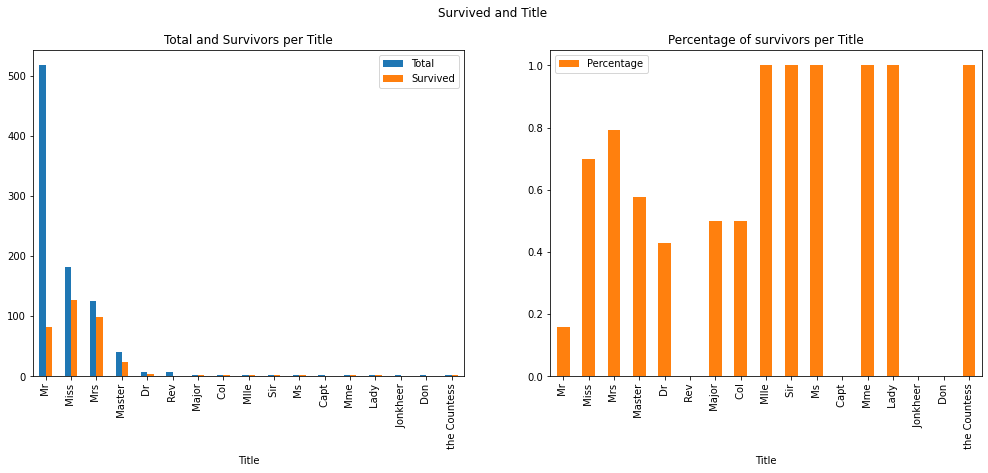

In [252]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
title_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Title")
title_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Title")
plt.suptitle("Survived and Title");

In [254]:
title_survivors_df = titanic_df.groupby(["Title", "Pclass"])[["Survived"]].count()
title_survivors_df.columns=["Total"]
title_survivors_df["Survived"] = titanic_df.groupby(["Title", "Pclass"])[["Survived"]].sum()
title_survivors_df["Percentage"] = title_survivors_df["Survived"]/title_survivors_df["Total"]
title_survivors_df.sort_values("Total", ascending=False, inplace=True)
title_survivors_df

Total  Survived  Percentage
Title         Pclass                             
 Mr           3         319        36    0.112853
              1         107        37    0.345794
 Miss         3         102        51    0.500000
 Mr           2          91         8    0.087912
 Miss         1          46        44    0.956522
 Mrs          3          42        21    0.500000
              1          42        41    0.976190
              2          41        37    0.902439
 Miss         2          34        32    0.941176
 Master       3          28        11    0.392857
              2           9         9    1.000000
 Rev          2           6         0    0.000000
 Dr           1           5         3    0.600000
 Master       1           3         3    1.000000
 Major        1           2         1    0.500000
 Col          1           2         1    0.500000
 Mlle         1           2         2    1.000000
 Dr           2           2         0    0.000000
 Ms           2           1         1    1.000000
 Sir          1           1         1    1.000000
 Capt         1           1         0    0.000000
 Mme          1           1         1    1.000000
 Lady         1           1         1    1.000000
 Jonkheer     1           1         0    0.000000
 Don          1           1         0    0.000000
 the Countess 1           1         1    1.000000

There are a many titles that are only referring to 1 passenger each. Therefore, we see many 100% and 0% survival rates for these titles. What we again can see here, is that titles refering to female passengers (Miss and Mrs) have a higher survival rate. In addition, the title Master, a relatively large group of passengers compared to the other titles, also has a high survival rate.

## Feature Selection

As we have seen from the correlation between features and correlation with the targets, there are a few features that give specific insight in the survival of the passengers.